### PhD reseach 2020
### Kittipong Wangnok, D6010218
### School of Physics, Institute of Science, Suranaree University of Technology

#### 0. Import all modules

In [1]:
import sys
import os
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from statistics import stdev
from statistics import mean
np.seterr(divide='ignore', invalid='ignore')

#Latex font
import matplotlib as mpl
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

#Model fitting
from lmfit.models import StepModel, LinearModel

#### 1. Input file: lcurve_dpleo_data

In [2]:
#Please change the input file
lcurve_dpleo_data = open("dpleo_20200122_run028g.dat",'r').readlines()
N_lcurve_dpleo_data = len(lcurve_dpleo_data)

dat_BJD_time = []
dat_BJD_time_err = []
dat_Flux = []
dat_Flux_err = []

for line in open("dpleo_20200122_run028g.dat"):
    li=line.strip()
    if not li.startswith("#"):
        dat_BJD_time.append(float(li.split(" ")[0]))
        dat_BJD_time_err.append(float(li.split(" ")[1]))
        dat_Flux.append(float(li.split(" ")[2]))
        dat_Flux_err.append(float(li.split(" ")[3]))

data_result = []
for i in range (len(lcurve_dpleo_data)):
#    print ('%0.6f\t%0.6f\t%0.6f\t%0.6f' %(dat_BJD_time[i],dat_BJD_time_err[i],dat_Flux[i],dat_Flux_err[i]))
    data_result.append('%0.6f\t%0.6f\t%0.6f\t%0.6f' %(dat_BJD_time[i],dat_BJD_time_err[i],dat_Flux[i],dat_Flux_err[i]))
    
dat = data_result
f = open('data_dpleo_20200122_run028g.txt', 'w')
#for upper_result in upper_result:
for i in range(len(dat)):
    f.write(str(dat[i])+ '\n')
f.close()

#### 2. Input file: lcurve_dpleo_output

In [3]:
#Please change the input file
lcurve_dpleo_output = open("dpleo_20200122_run028g.out",'r').readlines()
N_lcurve_dpleo_output = len(lcurve_dpleo_output)

out_BJD_time = []
out_BJD_time_err = []
out_Flux = []
out_Flux_err = []

for line in open("dpleo_20200122_run028g.out"):
    li=line.strip()
    if not li.startswith("#"):
        out_BJD_time.append(float(li.split(" ")[0]))
        out_BJD_time_err.append(float(li.split(" ")[1]))
        out_Flux.append(float(li.split(" ")[2]))
        out_Flux_err.append(float(li.split(" ")[3]))
        
output_result = []
Res = []
residual_result = []
Chi_sqr_a = [i for i in range(len(lcurve_dpleo_data))]

for i in range (len(lcurve_dpleo_data)):
#    print (out_BJD_time[0])
#    print ('%0.6f\t%0.6f\t%0.6f\t%0.6f' %(out_BJD_time[i],out_BJD_time_err[i],out_Flux[i],out_Flux_err[i]))
    output_result.append('%0.6f\t%0.6f\t%0.6f\t%0.6f' %(out_BJD_time[i],out_BJD_time_err[i],out_Flux[i],out_Flux_err[i]))
    Res = dat_Flux[i] - out_Flux[i]
    residual_result.append('%0.6f' %(Res))
    Chi_sqr = (dat_Flux[i] - out_Flux[i])**2/out_Flux[i]
    Chi_sqr_a[i] = Chi_sqr
    chisq = sum(Chi_sqr_a)
    
out = output_result
f = open('output_dpleo_20200122_run028g.txt', 'w')
#for upper_result in upper_result:
for i in range(len(out)):
    f.write(str(out[i])+ '\n')
f.close()

res = residual_result
f = open('residual_dpleo_20200122_run028g.txt', 'w')
#for upper_result in upper_result:
for i in range(len(res)):
    f.write(str(res[i])+ '\n')
f.close()

#### 3. Plot the result: Relative flux vs. BJD
#### 4. Plot the result: Relative flux vs. Orbital phase

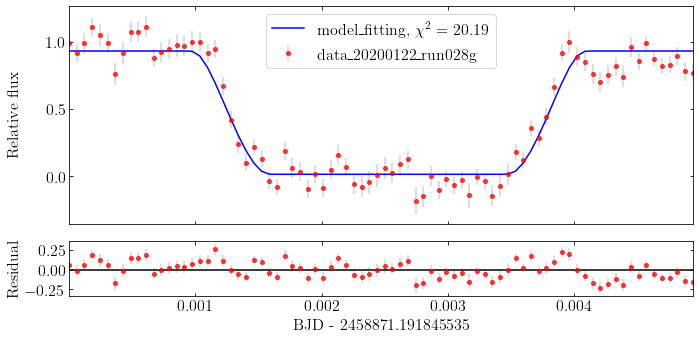

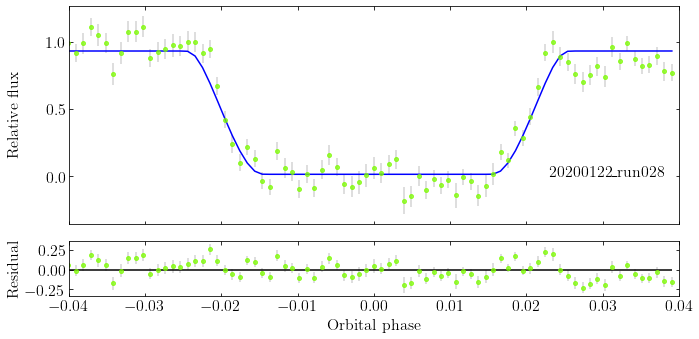

In [4]:
InputFile_1 = "data_dpleo_20200122_run028g.txt"
Data_1   = np.genfromtxt(InputFile_1)

InputFile_2 = "output_dpleo_20200122_run028g.txt"
Data_2   = np.genfromtxt(InputFile_2)

InputFile_3 = "residual_dpleo_20200122_run028g.txt"
Data_3   = np.genfromtxt(InputFile_3)

#DP Leo parameters
t0_20200122_run028g = 2458871.194345
Period = 0.06236286
E = out_BJD_time[0]

BJD_time_1 = Data_1[:,0] - E
Cycle_1 = (Data_1[:,0] - t0_20200122_run028g)/Period
Phase_1 = Cycle_1
Flux_1 = Data_1[:,2]
Flux_err_1 = Data_1[:,3]

BJD_time_2 = Data_2[:,0] - E
Cycle_2 = (Data_2[:,0] - t0_20200122_run028g)/Period
Phase_2 = Cycle_2
Flux_2 = Data_2[:,2]
Flux_err_2 = Data_2[:,3]

Res = Flux_1 - Flux_2
#print (Res)

fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlim(BJD_time_1[0], BJD_time_1[-1])
#plt.xlim(0.6405, 0.646)
plt.xlabel('BJD - '+str(E))

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(BJD_time_1, Flux_1, yerr=Flux_err_1, fmt='o', color='red',alpha = 0.75,
                    ecolor='lightgray', elinewidth=2, capsize=0, markersize='4.00', label = 'data\_20200122\_run028g' )

ax0.plot(BJD_time_2, Flux_2, 'b-', label='model\_fitting, $\chi^2$ = '+str('%0.2f' %(chisq)))
ax0.legend(loc="best")
ax0.set_ylabel('Relative flux')
ax1.errorbar(BJD_time_1, Res, yerr=Flux_err_1, fmt='o', color='red',alpha = 0.75,
                    ecolor='lightgray', elinewidth=2, capsize=0, markersize='4.00')
ax1.hlines(y=0, xmin=BJD_time_1[0], xmax=BJD_time_1[-1], colors='black', linestyles='-')
ax1.set_ylabel('Residual')
fig.align_ylabels()
#output_filename = os.path.splitext(__file__)[0] + '.png'
plt.savefig("lcurve_dpleo_20200122_run028g_bjd.png")
plt.show()

########################################################################################################

fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlim(-0.04,0.04)
plt.xlabel('Orbital phase')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(Phase_1, Flux_1, yerr=Flux_err_1, fmt='o', color='lawngreen',alpha = 0.75,
                    ecolor='lightgray', elinewidth=2, capsize=0, markersize='4.00', label = 'data\_20200122\_run028g' )
ax0.plot(Phase_2, Flux_2, 'b-')
ax0.text(0.023, 0, '20200122\_run028')

#ax0.legend(loc="best")
ax0.set_ylabel('Relative flux')
#ax0.set_ylim(-0.05, 0.725)

ax1.errorbar(Phase_1, Res, yerr=Flux_err_1, fmt='o', color='lawngreen',alpha = 0.75,
                    ecolor='lightgray', elinewidth=2, capsize=0, markersize='4.00', label = 'data\_20200122\_run028g' )
ax1.hlines(y=0, xmin=Phase_1[0], xmax=Phase_1[-1], colors='black', linestyles='-')
ax1.set_ylabel('Residual')

fig.align_ylabels()
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.savefig("lcurve_dpleo_20200122_run028g_phase.png")
plt.show()

#### 5. Plot the WD model

Epoch: 2458871


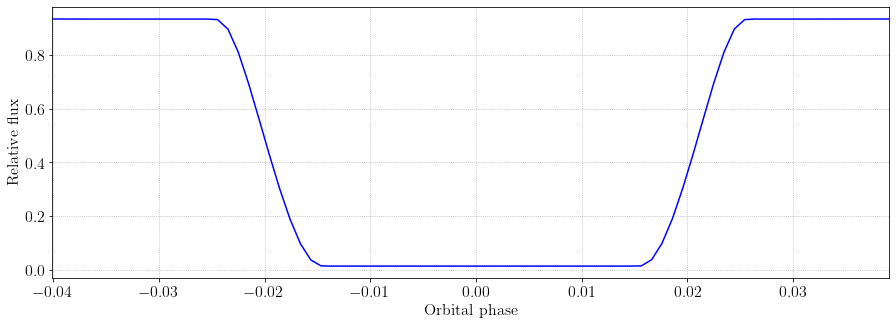

In [5]:
#Input file 
BJD_time_2 = Data_2[:,0]
Flux_2 = Data_2[:,2]
Flux_err_2 = Data_2[:,3]
#-----------------------------------------------------------------------
#Epoch
E = np.int(BJD_time_2[0])
print('Epoch:', E)

#Array
Phase_a =[i for i in range(len(BJD_time_2))]

#Determine the phase maximum
for i in range(len(BJD_time_2)):
    Phase = (BJD_time_2[i] - t0_20200122_run028g)/Period
    Phase_a[i] = Phase
#    print('%0.6f' %(Phase))

fig=plt.figure(figsize=(15, 5))
plt.errorbar(Phase_a, Flux_2, yerr=Flux_err_2, fmt='-', color='blue')
plt.xlim(Phase_a[0],Phase_a[-1])
plt.xlabel('Orbital phase')
plt.ylabel('Relative flux')
plt.grid(linestyle='dotted')
plt.show()
#-----------------------------------------------------------------------

#### 6. Write the input file for ingress and egress times

In [6]:
ing_BJD_time = []
egr_BJD_time = []
#print('-------------------------------------------------------------------')
#print('No. \t MJD_time \t Phase \t\t Flux \t\t Flux_err')
#print('-------------------------------------------------------------------')
for i in range(len(BJD_time_2)):
    if Phase_a[i] <= 0:
        ing_BJD_time.append('%0.0f %0.6f %0.6f %0.6f %0.6f' %(i,BJD_time_2[i],Phase_a[i], Flux_2[i],  Flux_err_2[i]))
#        print('%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(i,BJD_time_2[i],Phase_a[i], Flux_2[i],  Flux_err_2[i]))
    else:
        egr_BJD_time.append('%0.0f %0.6f %0.6f %0.6f %0.6f' %(i,BJD_time_2[i],Phase_a[i], Flux_2[i],  Flux_err_2[i]))
#        print('%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(i,BJD_time_2[i],Phase_a[i], Flux_2[i],  Flux_err_2[i]))



data_ing = ing_BJD_time
f_ing = open("dpleo_20200122_run028g_ing.out", 'w')
for i in range(len(data_ing)):
    f_ing.write(str(data_ing[i])+ '\n')
f_ing.close()

data_egr = egr_BJD_time
f_egr = open("dpleo_20200122_run028g_egr.out", 'w')
for i in range(len(data_egr)):
    f_egr.write(str(data_egr[i])+ '\n')
f_egr.close()

#### 7. plot the ingress and egress times

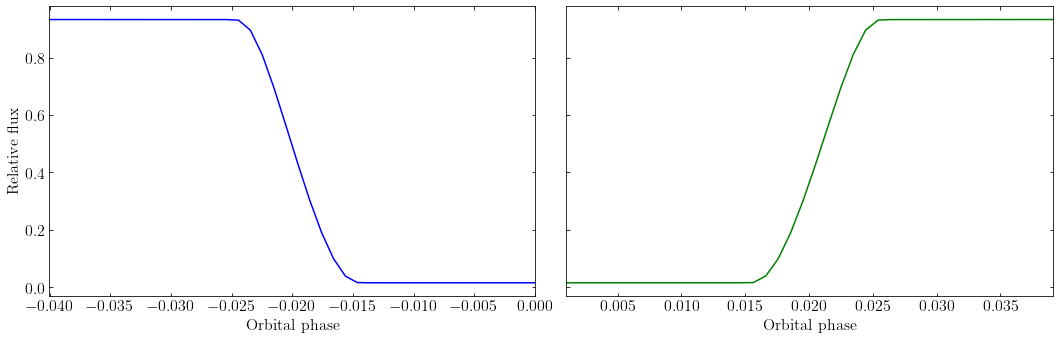

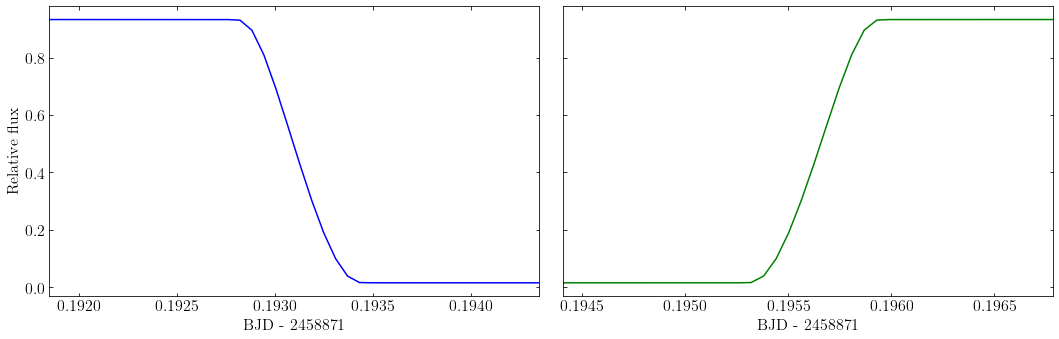

In [7]:
InputFile_ing = "dpleo_20200122_run028g_ing.out"
Data_ing   = np.genfromtxt(InputFile_ing)

#Read data for ingress time
ing_i = Data_ing[:,0]
ing_BJD_time = Data_ing[:,1] - E
ing_Phase = Data_ing[:,2]
ing_Flux_2 = Data_ing[:,3]
ing_Flux_err_2 = Data_ing[:,4]
#print(ing_Phase)

#Input file for egress time
InputFile_egr = "dpleo_20200122_run028g_egr.out"
Data_egr   = np.genfromtxt(InputFile_egr)

#Read data for egress time
egr_i = Data_egr[:,0]
egr_BJD_time = Data_egr[:,1] - E
egr_Phase = Data_egr[:,2]
egr_Flux_2 = Data_egr[:,3]
egr_Flux_err_2 = Data_egr[:,4]


#Relative flux vs. orbital phase
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharex=False, sharey=True, tight_layout=True)
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax2.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.set_xlabel('Orbital phase')
ax2.set_xlabel('Orbital phase')
ax1.set_xlim(ing_Phase[0],ing_Phase[-1])
ax2.set_xlim(egr_Phase[0],egr_Phase[-1])
ax1.set_ylabel('Relative flux')
ax1.errorbar(ing_Phase, ing_Flux_2, yerr=ing_Flux_err_2, fmt='-', color='blue')
ax2.errorbar(egr_Phase, egr_Flux_2, yerr=egr_Flux_err_2, fmt='-', color='green')

#Relative flux vs. BJD

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharex=False, sharey=True, tight_layout=True)
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax2.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.set_xlabel('BJD - '+str(E))
ax2.set_xlabel('BJD - '+str(E))
ax1.set_xlim(ing_BJD_time[0], ing_BJD_time[-1])
ax2.set_xlim(egr_BJD_time[0], egr_BJD_time[-1])
ax1.set_ylabel('Relative flux')
ax1.errorbar(ing_BJD_time, ing_Flux_2, yerr=ing_Flux_err_2, fmt='-', color='blue')
ax2.errorbar(egr_BJD_time, egr_Flux_2, yerr=egr_Flux_err_2, fmt='-', color='green')

fig.align_ylabels()
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.show()

#### 8. Ingress and egress times fitting #1

Please enter the center to do the fitting #1  	 [Default: 0.1932] 	:  
[[Model]]
    (Model(step, prefix='step_', form='erf') + Model(linear, prefix='line_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 55
    # data points      = 42
    # variables        = 5
    chi-square         = 0.00203044
    reduced chi-square = 5.4877e-05
    Akaike info crit   = -407.361194
    Bayesian info crit = -398.672846
[[Variables]]
    line_slope:      11.1209350 +/- 5.01456118 (45.09%) (init = 0)
    line_intercept: -1.20368818 +/- 0.96423511 (80.11%) (init = 0.015173)
    step_amplitude: -0.93883028 +/- 0.00860495 (0.92%) (init = 0.917227)
    step_center:     0.19310765 +/- 1.6267e-06 (0.00%) (init = 0.1932)
    step_sigma:      2.1850e-04 +/- 4.0335e-06 (1.85%) (init = 0.000357)
[[Correlations]] (unreported correlations are < 0.100)
    C(line_slope, line_intercept)     = -1.000
    C(line_slope, step_amplitude)     = -0.950
    C(line_intercept, step_amplitude) =

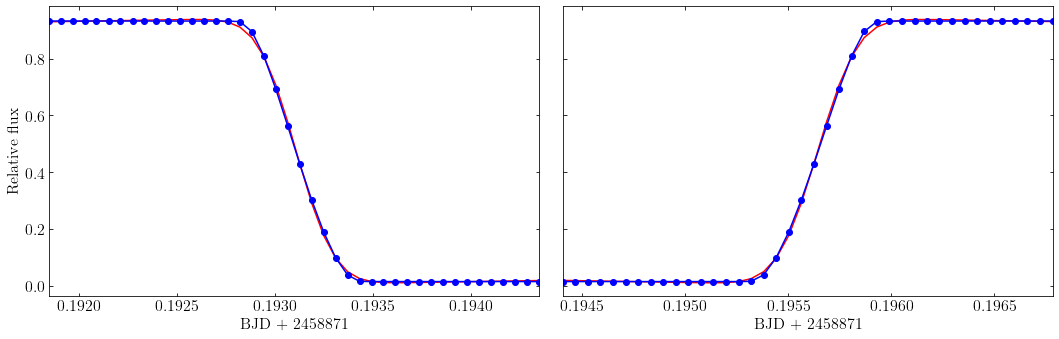

In [8]:
#Read data: ingress 
InputFile_ing = "dpleo_20200122_run028g_ing.out"
Data_ing   = np.genfromtxt(InputFile_ing)

ing_i = Data_ing[:,0]
ing_BJD_time = Data_ing[:,1]
ing_Phase = Data_ing[:,2]
ing_Flux_2 = Data_ing[:,3]
ing_Flux_err_2 = Data_ing[:,4]

#Input file to do the fitting
ing_x = np.array(ing_BJD_time) - E
ing_y = np.array(ing_Flux_2)
ing_y_err = np.array(ing_Flux_err_2)

#Step and Linear function for fitting
step_mod = StepModel(form='erf', prefix='step_')
line_mod = LinearModel(prefix='line_')

C = input('Please enter the center to do the fitting #1  \t [Default: 0.1932] \t:  ') or "0.1932"
pars = line_mod.make_params(intercept=ing_y.min(), slope=0)
#pars += step_mod.guess(y, x=x, center=0.2555)  #Don't forget to adjust this number
pars += step_mod.guess(ing_y, x=ing_x, center = float(C))

#Model and the result of the model #1
mod_ing = step_mod + line_mod
out_ing = mod_ing.fit(ing_y, pars, x=ing_x)

#print the output of the result #1
print(out_ing.fit_report())

#Read data: egress 
InputFile_egr = "dpleo_20200122_run028g_egr.out"
Data_egr   = np.genfromtxt(InputFile_egr)

egr_i = Data_egr[:,0]
egr_BJD_time = Data_egr[:,1]
egr_Phase = Data_egr[:,2]
egr_Flux_2 = Data_egr[:,3]
egr_Flux_err_2 = Data_egr[:,4]

#Input file to do the fitting
egr_x = np.array(egr_BJD_time) - E
egr_y = np.array(egr_Flux_2)
egr_y_err = np.array(egr_Flux_err_2)

#Step and Linear function for fitting
step_mod = StepModel(form='erf', prefix='step_')
line_mod = LinearModel(prefix='line_')

C = input('Please enter the center to do the fitting #1  \t [Default: 0.1956] \t:  ') or "0.1956"
pars = line_mod.make_params(intercept=egr_y.min(), slope=0)
#pars += step_mod.guess(y, x=x, center=0.2555)  #Don't forget to adjust this number
pars += step_mod.guess(egr_y, x=egr_x, center = float(C))

#Model and the result od the model #1
mod_egr = step_mod + line_mod
out_egr = mod_egr.fit(egr_y, pars, x=egr_x)

#print the output of the result #1
print(out_egr.fit_report())


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharex=False, sharey=True, tight_layout=True)
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax2.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.set_xlabel('BJD + '+str(E))
ax2.set_xlabel('BJD + '+str(E))
ax1.errorbar(ing_x, ing_y, ing_y_err, fmt='-o', color='blue', label='Data')
ax1.plot(ing_x, out_ing.best_fit, 'r-', label='best fit')
ax2.errorbar(egr_x, egr_y, egr_y_err, fmt='-o', color='blue', label='Data')
ax2.plot(egr_x, out_egr.best_fit, 'r-', label='best fit')
ax1.set_ylabel('Relative flux')
ax1.set_xlim(ing_x[0], ing_x[-1])
ax2.set_xlim(egr_x[0], egr_x[-1])

#plt.ylabel('Relative flux')
#plt.grid(linestyle='dotted')
#plt.legend(loc='best')
plt.show()

#### 9. Ingress and egress times fitting #2

Please enter the center to do the fitting #2  	 [Default: 0.19310735] 	:  
[[Model]]
    (Model(step, prefix='step_', form='erf') + Model(linear, prefix='line_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 55
    # data points      = 42
    # variables        = 5
    chi-square         = 0.00203044
    reduced chi-square = 5.4877e-05
    Akaike info crit   = -407.361194
    Bayesian info crit = -398.672846
[[Variables]]
    line_slope:      11.1213916 +/- 5.01450364 (45.09%) (init = 0)
    line_intercept: -1.20377591 +/- 0.96422408 (80.10%) (init = 0.015173)
    step_amplitude: -0.93883115 +/- 0.00860482 (0.92%) (init = 0.917227)
    step_center:     0.19310765 +/- 1.6267e-06 (0.00%) (init = 0.1931074)
    step_sigma:      2.1851e-04 +/- 4.0334e-06 (1.85%) (init = 0.000357)
[[Correlations]] (unreported correlations are < 0.100)
    C(line_slope, line_intercept)     = -1.000
    C(line_slope, step_amplitude)     = -0.950
    C(line_intercept, step_ampli

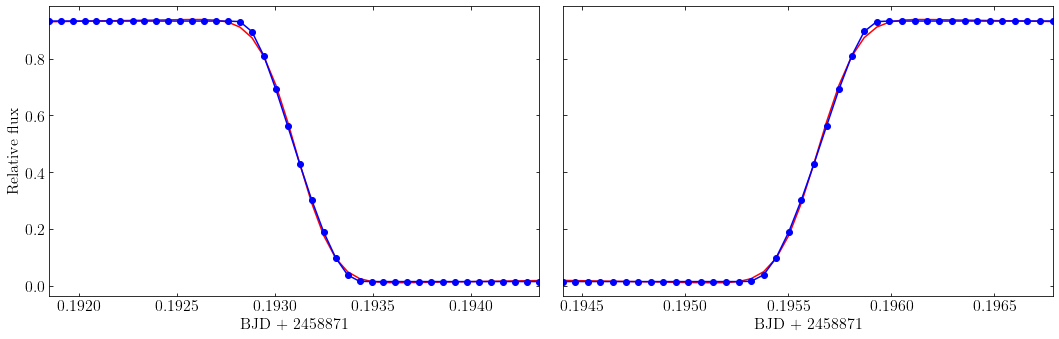

In [9]:
C_ing = input('Please enter the center to do the fitting #2  \t [Default: 0.19310735] \t:  ') or "0.19310735"
pars = line_mod.make_params(intercept=ing_y.min(), slope=0)
#pars += step_mod.guess(y, x=x, center=0.2555)  #Don't forget to adjust this number
pars += step_mod.guess(ing_y, x=ing_x, center = float(C_ing))

#Model and the result of the model #2
mod_ing = step_mod + line_mod
out_ing = mod_ing.fit(ing_y, pars, x=ing_x)

#print the output of the result #2
print(out_ing.fit_report())

#Fitting no.2 --- Egress
C_egr = input('Please enter the center to do the fitting #2  \t [Default: 0.19564273] \t:  ') or "0.19564273"
pars = line_mod.make_params(intercept=egr_y.min(), slope=0)
#pars += step_mod.guess(y, x=x, center=0.2555)  #Don't forget to adjust this number
pars += step_mod.guess(egr_y, x=egr_x, center = float(C_egr))

#Model and the result od the model #2
mod_egr = step_mod + line_mod
out_egr = mod_egr.fit(egr_y, pars, x=egr_x)

#print the output of the result #2
print(out_egr.fit_report())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharex=False, sharey=True, tight_layout=True)
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax2.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.set_xlabel('BJD + '+str(E))
ax2.set_xlabel('BJD + '+str(E))

ax1.set_xlim(ing_x[0], ing_x[-1])
ax2.set_xlim(egr_x[0], egr_x[-1])

ax1.errorbar(ing_x, ing_y, ing_y_err, fmt='-o', color='blue', label='Data')
ax1.plot(ing_x, out_ing.best_fit, 'r-', label='best fit')

ax2.errorbar(egr_x, egr_y, egr_y_err, fmt='-o', color='blue', label='Data')
ax2.plot(egr_x, out_egr.best_fit, 'r-', label='best fit')

ax1.set_ylabel('Relative flux')

#plt.ylabel('Relative flux')
#plt.grid(linestyle='dotted')
#plt.legend(loc='best')
plt.show()

#### 9. Write the result of mid-ingress and egress times (with the uncertainties)

In [10]:
C_ing = input('Please enter the center of mid-ingress time from the fitting #2  \t [Default: 0.19310735] \t:  ') or "0.19310735"
C_ing_err = input('Please enter the error the center of mid-ingress time from the fitting #2  \t [Default: 1.7066e-06] \t:  ') or "1.7066e-06"
C_egr = input('Please enter the center of mid-egress time from the fitting #2  \t [Default: 0.19564273] \t:  ') or "0.19564273"
C_egr_err = input('Please enter the error the center of mid-egress time from the fitting #2  \t [Default: 1.6786e-06] \t:  ') or "1.6786e-06"

Please enter the center of mid-ingress time from the fitting #2  	 [Default: 0.19310735] 	:  
Please enter the error the center of mid-ingress time from the fitting #2  	 [Default: 1.7066e-06] 	:  
Please enter the center of mid-egress time from the fitting #2  	 [Default: 0.19564273] 	:  
Please enter the error the center of mid-egress time from the fitting #2  	 [Default: 1.6786e-06] 	:  


#### 10. Save output files of ingress ans egress times

In [11]:
np.savetxt("lmfit_dpleo_20200122_run028g.ing", np.c_[ing_BJD_time, ing_Flux_2, ing_Flux_err_2, out_ing.best_fit], comments='#BJD, flux, flux_err, bestfit')
np.savetxt("lmfit_dpleo_20200122_run028g.egr", np.c_[egr_BJD_time, egr_Flux_2, egr_Flux_err_2, out_egr.best_fit], comments='#BJD, flux, flux_err, bestfit')

#### 11. Plot the fitting of mid-ingress and egress times

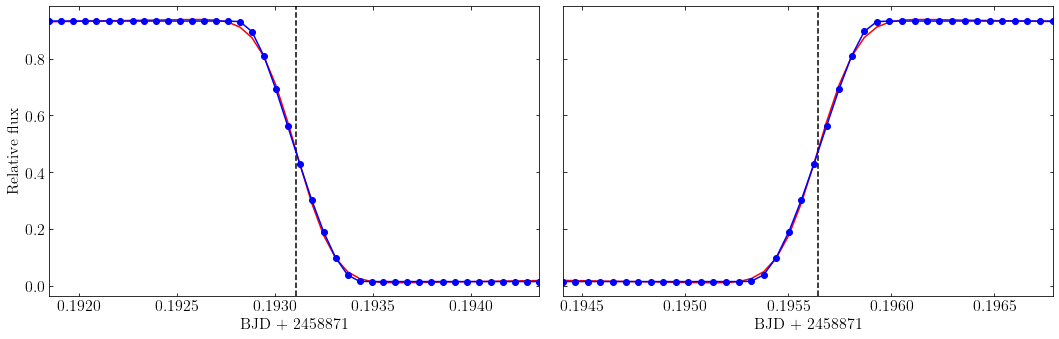

In [12]:
#Fitting plot
InputFile_ing = "lmfit_dpleo_20200122_run028g.ing"
Data_ing   = np.genfromtxt(InputFile_ing)

ing_BJD_time = Data_ing[:,0] - E
ing_Flux = Data_ing[:,1]
ing_Flux_err = Data_ing[:,2]
ing_Out = Data_ing[:,3]

InputFile_egr = "lmfit_dpleo_20200122_run028g.egr"
Data_egr   = np.genfromtxt(InputFile_egr)

egr_BJD_time = Data_egr[:,0] - E
egr_Flux = Data_egr[:,1]
egr_Flux_err = Data_egr[:,2]
egr_Out = Data_egr[:,3]

#Plot the result
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharex=False, sharey=True, tight_layout=True)


ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax2.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax1.set_xlabel('BJD + '+str(E))
ax2.set_xlabel('BJD + '+str(E))

ax1.set_xlim(ing_BJD_time[0], ing_BJD_time[-1])
ax2.set_xlim(egr_BJD_time[0], egr_BJD_time[-1])

ax1.set_ylabel('Relative flux')


ax1.errorbar(ing_BJD_time, ing_Flux, yerr=ing_Flux_err, fmt='-o', color='blue', label='Data')
ax1.plot(ing_x, out_ing.best_fit, 'r-', label='best fit')

ax2.errorbar(egr_BJD_time, egr_Flux_2, yerr=egr_Flux_err_2, fmt='-o', color='blue', label='Data')
ax2.plot(egr_x, out_egr.best_fit, 'r-', label='best fit')

ax1.axvline(x=float(C_ing), color='k', linestyle='--')
ax2.axvline(x=float(C_egr), color='k', linestyle='--')


fig.align_ylabels()
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.show()

#### 12. Mid-eclipse time calculation

T0(BJD):
2458871.1943750400
T0_err(BJD):
0.0000011969


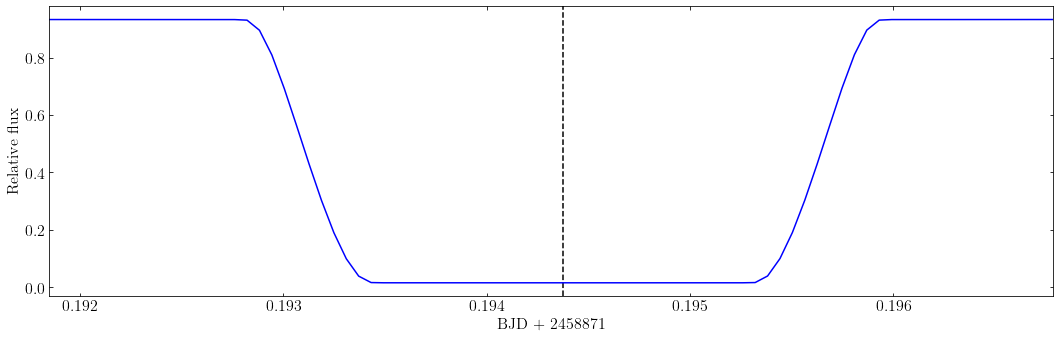

In [13]:
t_ing=float(C_ing)
t_egr=float(C_egr)
t_ing_err=float(C_ing_err)
t_egr_err=float(C_egr_err)
t_avg = (t_ing + t_egr)/2
t_avg_err = np.sqrt((t_ing_err**2)+(t_egr_err**2))/2
t_mid = t_avg + E
t_mid_err = t_avg_err
print('T0(BJD):')
print('%0.10f' %(t_mid))
print('T0_err(BJD):')
print('%0.10f' %(t_mid_err))

fig=plt.figure(figsize=(15, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
plt.axvline(x=t_avg, color='k', linestyle='--')
plt.errorbar(BJD_time_2 - E, Flux_2, yerr=Flux_err_2, fmt='-', color='blue')

#plt.errorbar(BJD_time_1 - E, Flux_1, yerr=Flux_err_1, fmt='o', markersize = 4, alpha = 0.25, color='red', label = 'data\_20170217\_run047kg5')
plt.xlim(ing_BJD_time[0],egr_BJD_time[-1])

fig.align_ylabels()
plt.xlabel('BJD + '+str(E))
plt.ylabel('Relative flux')
#plt.grid(linestyle='dotted')
plt.savefig("T0_dpleo_20200122_run028g.png")
plt.show()

In [14]:
t_ing=float(C_ing) + E
t_egr=float(C_egr) + E
t_ing_err=float(C_ing_err)
t_egr_err=float(C_egr_err)
WD_width_d = t_egr - t_ing
WD_width_d_err = np.sqrt((t_egr_err**2) + (t_ing_err**2))
WD_width_s = WD_width_d*24*60*60
WD_width_s_err = WD_width_d_err*24*60*60
print('\tT_ing \t\t T_egr \t WD_width(days) WD_width_err(days) WD_width(sec) WD_width_err(sec)')
print('%0.8f %0.8f  %0.8f  \t %0.8f \t\t %0.1f \t %0.1f' %(t_ing, t_egr, WD_width_d, WD_width_d_err, WD_width_s, WD_width_s_err))

	T_ing 		 T_egr 	 WD_width(days) WD_width_err(days) WD_width(sec) WD_width_err(sec)
2458871.19310735 2458871.19564273  0.00253538  	 0.00000239 		 219.1 	 0.2


#### 15. Measurement of the width of a white dwarf eclipse: FWHD

In [16]:
InputFile_2 = "output_dpleo_20200122_run028g.txt"
Data_2   = np.genfromtxt(InputFile_2)

#Input file 
BJD_time_2 = Data_2[:,0]
exp_time_2 = Data_2[:,1]
Flux_2 = Data_2[:,2]
Flux_err_2 = Data_2[:,3]
#-----------------------------------------------------------------------
#Epoch
E = np.int(BJD_time_2[0])
print('Epoch:', E)

#Array
Phase_a =[i for i in range(len(BJD_time_2))]

#Determine the phase maximum
for i in range(len(BJD_time_2)):
    Phase = (BJD_time_2[i] - t0_20200122_run028g)/Period
    Phase_a[i] = Phase
    Flux_2 = Data_2[:,2]
    print('%0.6f %0.6f' %(Phase_a[i], Flux_2[i]))
    high_max = max(Flux_2)
    high_min = min(Flux_2)
    half_high = (high_max + high_min)/2
#print('%0.6f %0.6f %0.6f' %(Flux_max, Flux_

Epoch: 2458871
-0.040072 0.932400
-0.039110 0.932388
-0.038132 0.932375
-0.037137 0.932363
-0.036175 0.932349
-0.035181 0.932334
-0.034219 0.932321
-0.033225 0.932309
-0.032247 0.932298
-0.031269 0.932286
-0.030290 0.932276
-0.029328 0.932266
-0.028334 0.932256
-0.027356 0.932249
-0.026394 0.932238
-0.025416 0.932228
-0.024438 0.930245
-0.023459 0.895048
-0.022481 0.808947
-0.021503 0.692092
-0.020525 0.561781
-0.019547 0.429022
-0.018569 0.302334
-0.017591 0.189754
-0.016612 0.099053
-0.015634 0.038430
-0.014656 0.016012
-0.013678 0.015214
-0.012700 0.015209
-0.011722 0.015205
-0.010744 0.015200
-0.009765 0.015196
-0.008787 0.015192
-0.007825 0.015188
-0.006847 0.015185
-0.005869 0.015182
-0.004891 0.015179
-0.003913 0.015177
-0.002934 0.015176
-0.001956 0.015175
-0.000978 0.015174
0.000000 0.015173
0.000978 0.015173
0.001956 0.015173
0.002934 0.015174
0.003913 0.015175
0.004891 0.015176
0.005869 0.015177
0.006847 0.015180
0.007825 0.015182
0.008803 0.015185
0.009781 0.015189
0.010760

High maximum 	 High minimum 	 Half high
0.932459 	 0.015173 	 0.473816


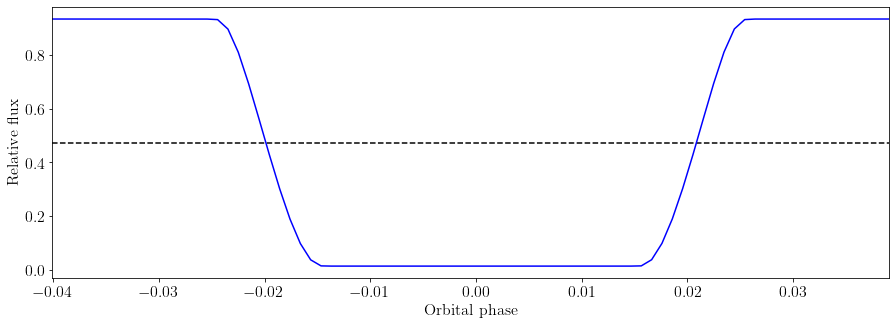

In [17]:
print('High maximum \t High minimum \t Half high')
print('%0.6f \t %0.6f \t %0.6f' %(high_max, high_min, half_high))
fig=plt.figure(figsize=(15, 5))
plt.errorbar(Phase_a, Flux_2, yerr=Flux_err_2, fmt='-', color='blue')
plt.xlim(Phase_a[0],Phase_a[-1])
plt.hlines(y= half_high, xmin=Phase_a[0], xmax=Phase_a[-1], colors='black', linestyles='--')
plt.xlabel('Orbital phase')
plt.ylabel('Relative flux')
#plt.grid(linestyle='dotted')
plt.show()

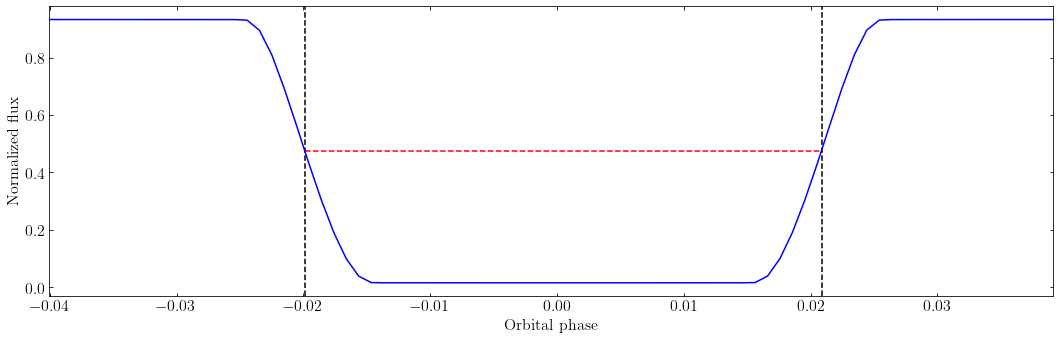

In [28]:
x1 = -0.0199
x2 = 0.0209
exp_time = exp_time_2[0]
#print(exp_time)


fig=plt.figure(figsize=(15, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
plt.errorbar(Phase_a, Flux_2, yerr=Flux_err_2, fmt='-', color='blue')
plt.xlim(Phase_a[0],Phase_a[-1])
#plt.plot(in_Phase, fwhd_FWHD, 'k-', color='red')
#plt.plot(-0.020177076, 0.020488150, 'k-', color='red')
plt.hlines(y= half_high, xmin= x1, xmax= x2, colors='r', linestyles='--')
plt.axvline(x=x1, color='k', linestyle='--')
plt.axvline(x=x2, color='k', linestyle='--')


plt.xlabel('Orbital phase')
plt.ylabel('Normalized flux')
#plt.grid(linestyle='dotted')
plt.savefig("FWHD_Optimized_T0_dpleo_20200122_run028g.png")
plt.show()

In [29]:
#Full Width at Half Depth (FWHD) determination 
t0_20200122_run028g = 2458871.194345
Period = 0.06236286
BJD0 = t0_20200122_run028g
x_start = x1
x_end = x2

Initial = (x_start*Period) + BJD0
#print(Initial)
Final = (x_end*Period) + BJD0
#print(Final)

WD_width = (Final - Initial)*24*60*60
#print('%0.0f' %(WD_width))


WD_width_err = (exp_time/2)*24*60*60
#print('%0.0f' %(WD_width_err))

print('WD_width(sec) WD_width_err(sec)')
print('%0.0f \t %0.0f' %(WD_width, WD_width_err))

WD_width(sec) WD_width_err(sec)
220 	 3
